# **1. Big Picture:** Problem Identification

### **Problem:** Predict whether a patient will develop coronary heart disease (CHD) within the next 10 years using Framingham Heart Study data.
### **Learning Type:** Supervised learning (labeled outcome: `TenYearCHD`).
### **Task Type:** Binary classification (0 = no CHD, 1 = CHD).
### **Technique:** k-Nearest Neighbors (K-NN) algorithm.
####--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **2. Loading Libraries and Dataset**
####--------------------------------------------------------------------------------------------

In [ ]:
# Load required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # suppress warnings for clean output

# Scikit-learn tools for building and evaluating ML models
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate model performance
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error
)

# Load the Framingham Heart Study dataset
df = pd.read_csv('/content/framingham.csv')  # Load dataset from specified path

# **3. Exploratory Data Analysis (EDA)**: Textual Exploration
####---------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Display a concise summary of the dataset including types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# Display first 5 rows of the dataset
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Display basic statistical details of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


# **4. Exploratory Data Analysis (EDA)**: Visual Exploration
####-----------------------------------------------------------------------------------------------------------------------------------------

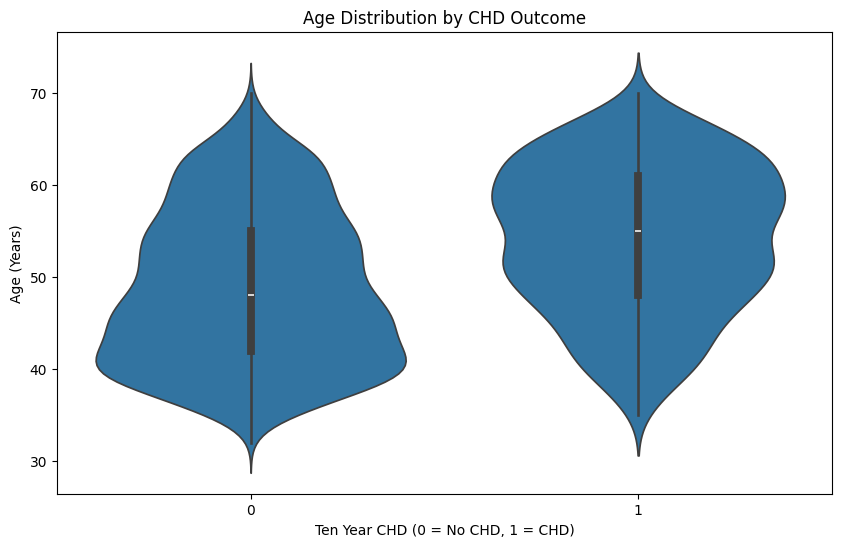

In [ ]:
# Age distribution grouped by CHD outcome
plt.figure(figsize=(10, 6))
sns.violinplot(x='TenYearCHD', y='age', data=df)
plt.title('Age Distribution by CHD Outcome')
plt.xlabel('Ten Year CHD (0 = No CHD, 1 = CHD)')
plt.ylabel('Age (Years)')
plt.show()

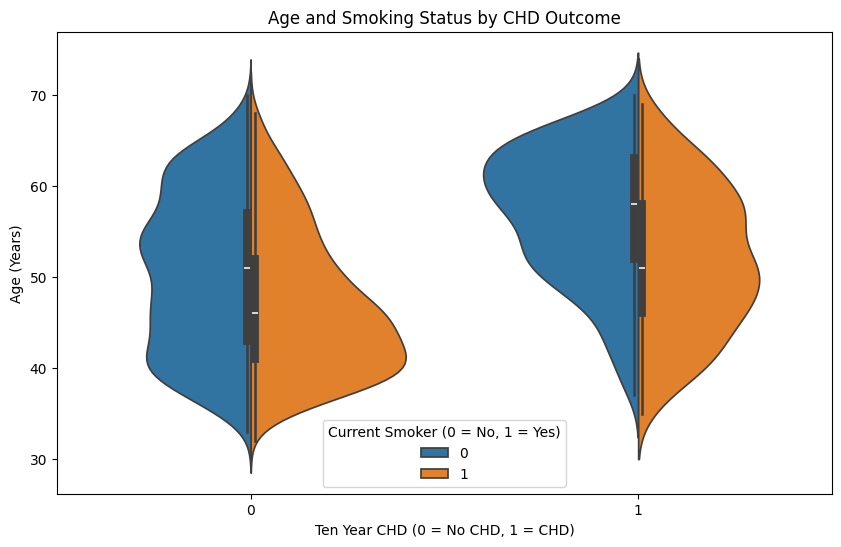

In [ ]:
# Age distribution grouped by CHD and colored by smoking status
plt.figure(figsize=(10, 6))
sns.violinplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker', split=True)
plt.title('Age and Smoking Status by CHD Outcome')
plt.xlabel('Ten Year CHD (0 = No CHD, 1 = CHD)')
plt.ylabel('Age (Years)')
plt.legend(title='Current Smoker (0 = No, 1 = Yes)')
plt.show()

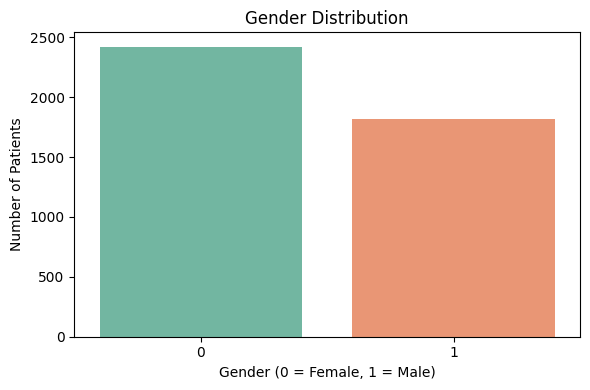

In [ ]:
# Gender distribution: Female vs Male
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

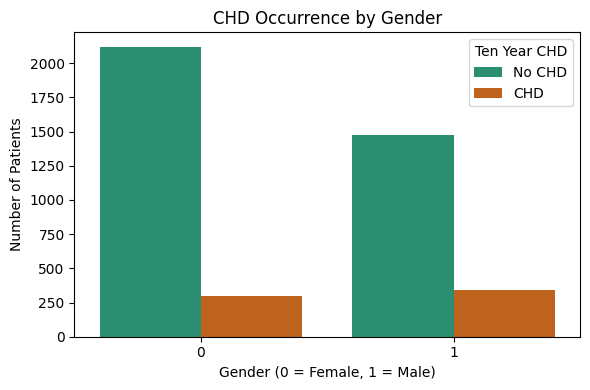

In [ ]:
# CHD distribution across gender categories
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='TenYearCHD', data=df, palette='Dark2')
plt.title('CHD Occurrence by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Patients')
plt.legend(title='Ten Year CHD', labels=['No CHD', 'CHD'])
plt.tight_layout()
plt.show()

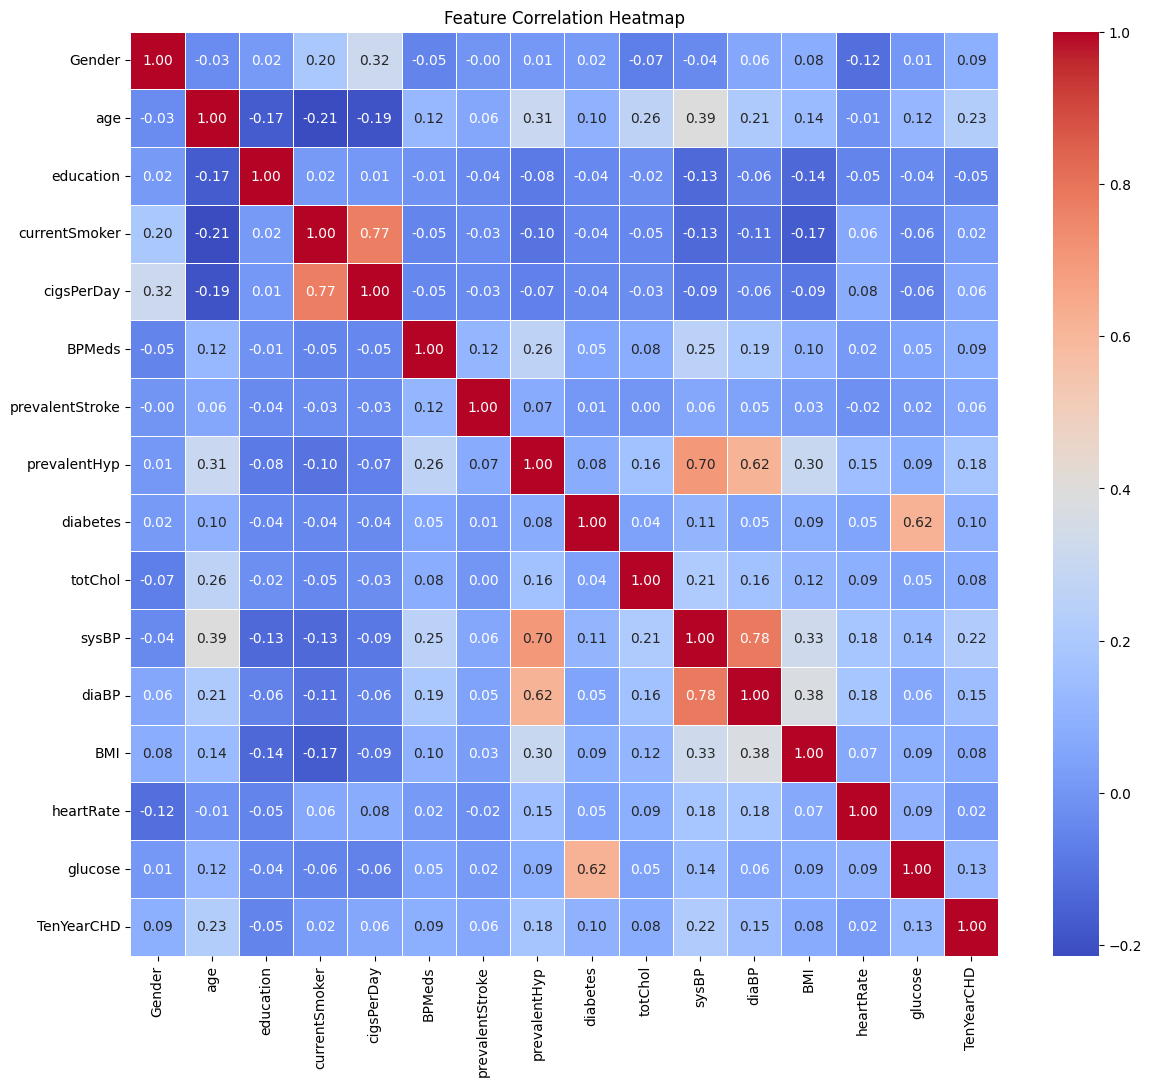

In [ ]:
# Heatmap showing correlation matrix between variables
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

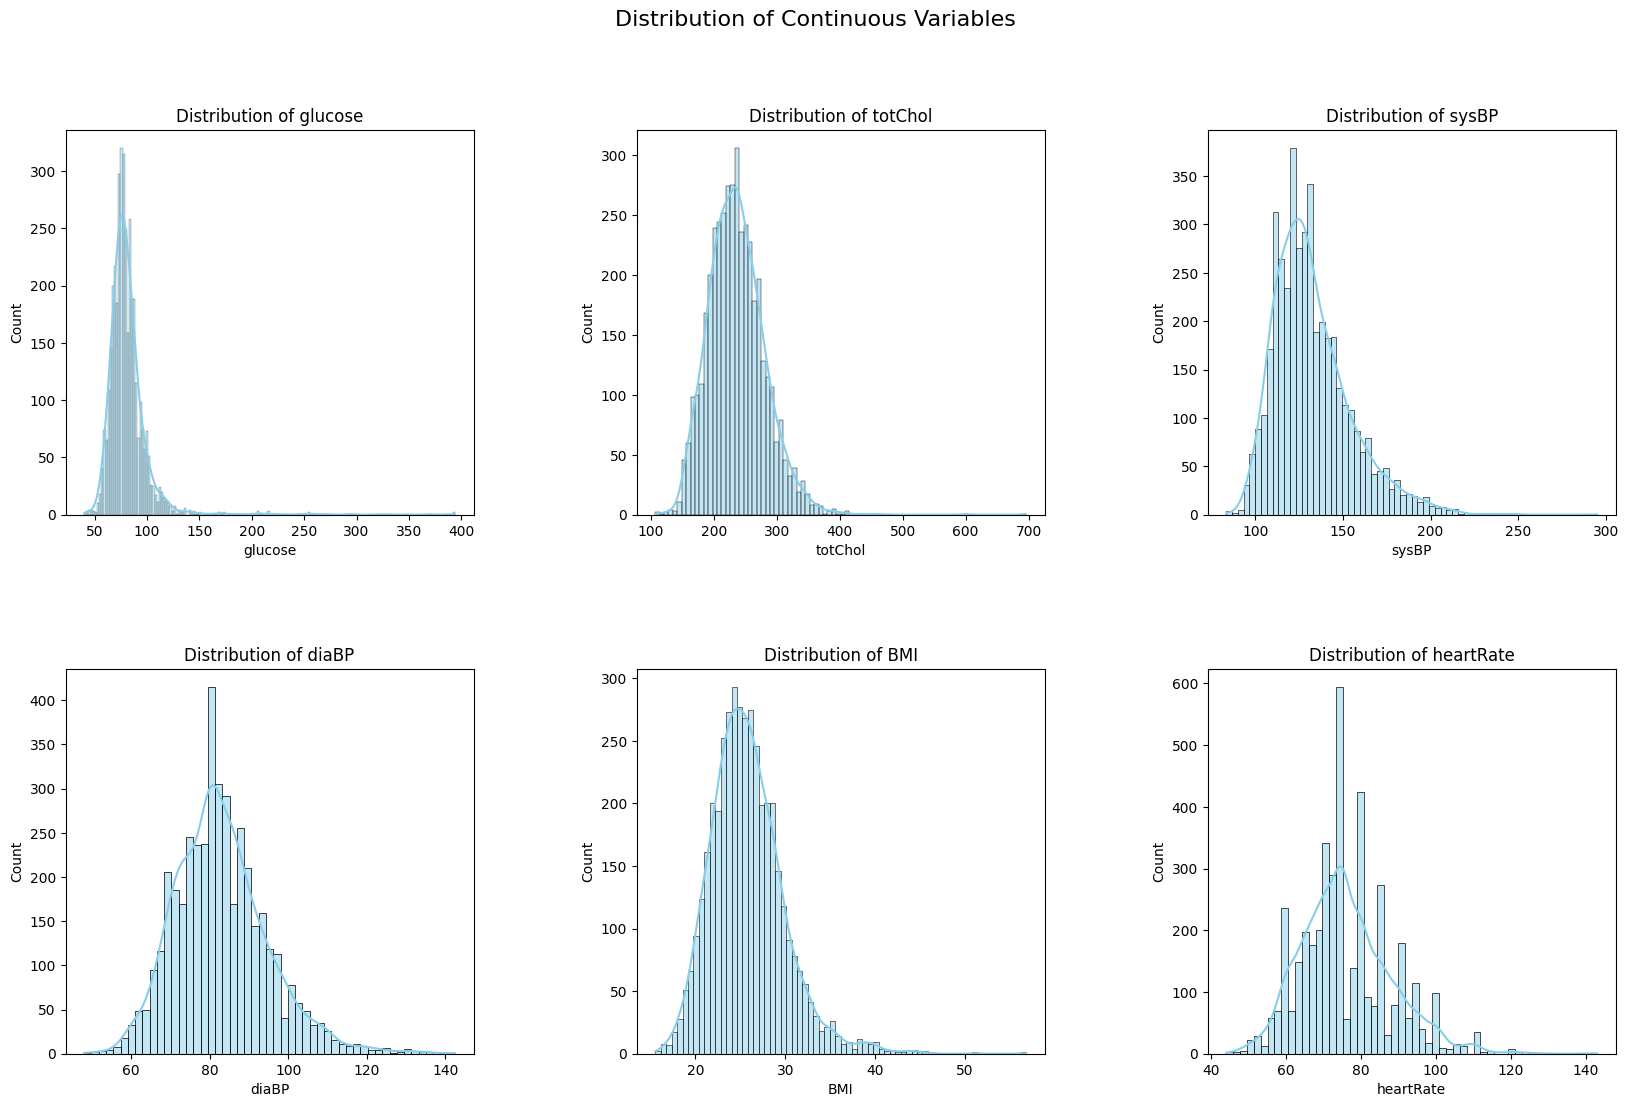

In [ ]:
# KDE distribution plots for continuous features
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

continuous_vars = ['glucose', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']

for idx, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)

plt.suptitle('Distribution of Continuous Variables', fontsize=16)
plt.show()

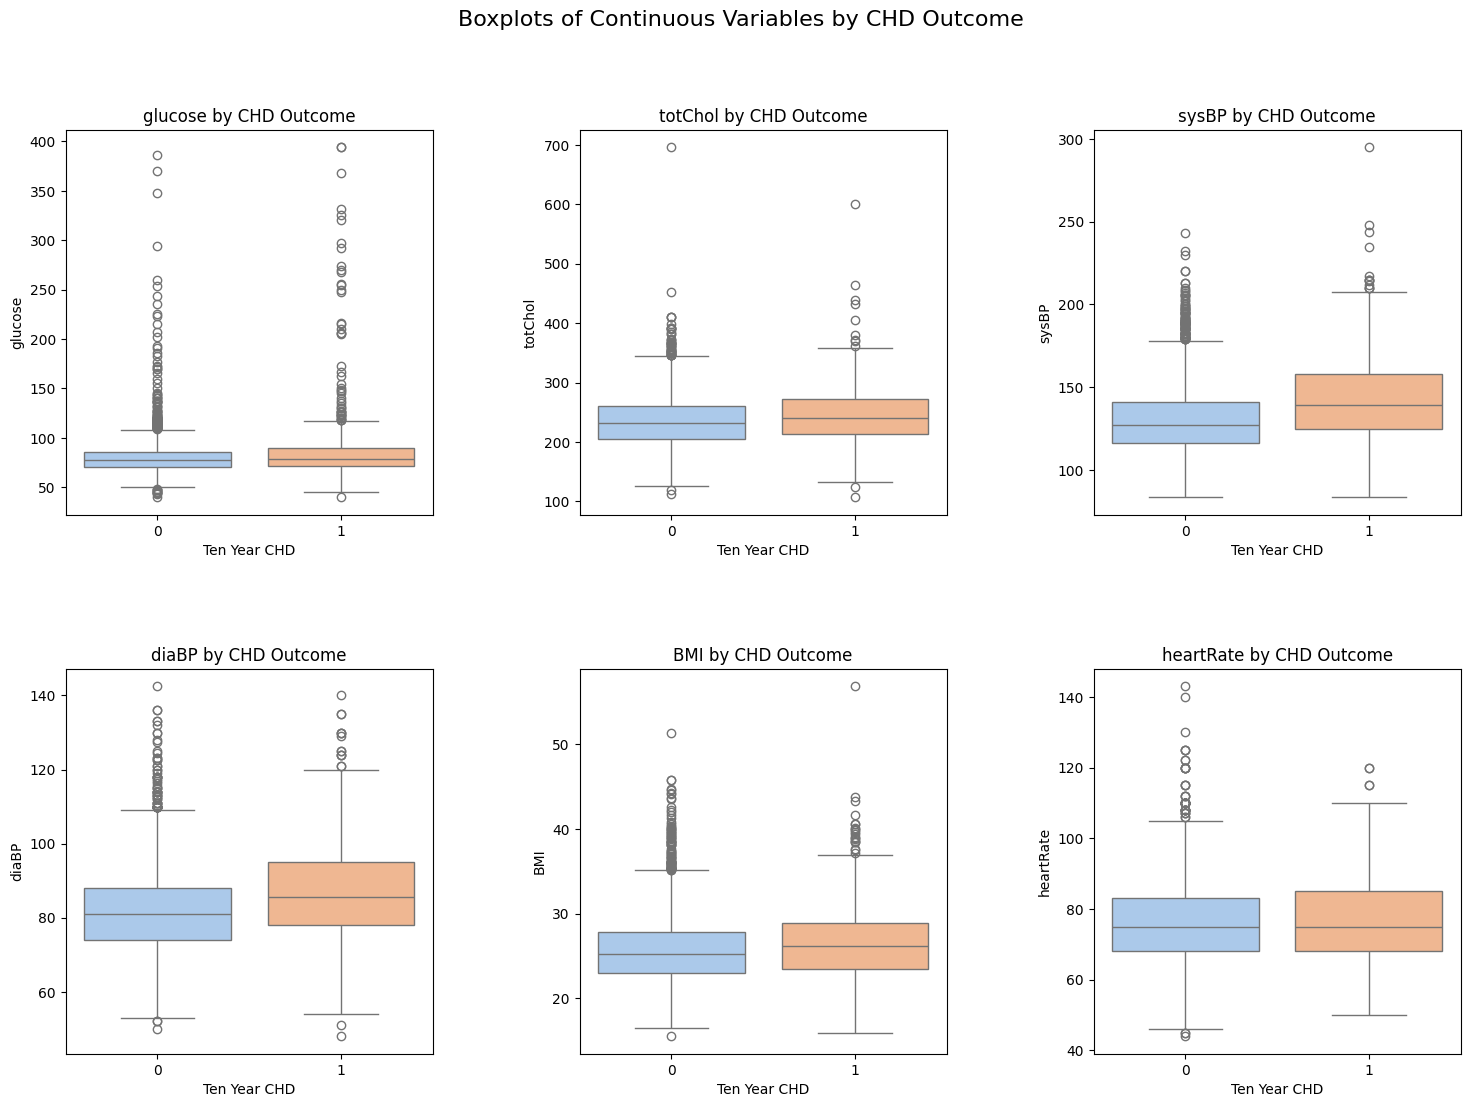

In [ ]:
# Boxplots to show spread and outliers grouped by CHD outcome
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for idx, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(x='TenYearCHD', y=var, data=df, palette='pastel')
    plt.title(f'{var} by CHD Outcome')
    plt.xlabel('Ten Year CHD')
    plt.ylabel(var)

plt.suptitle('Boxplots of Continuous Variables by CHD Outcome', fontsize=16)
plt.show()

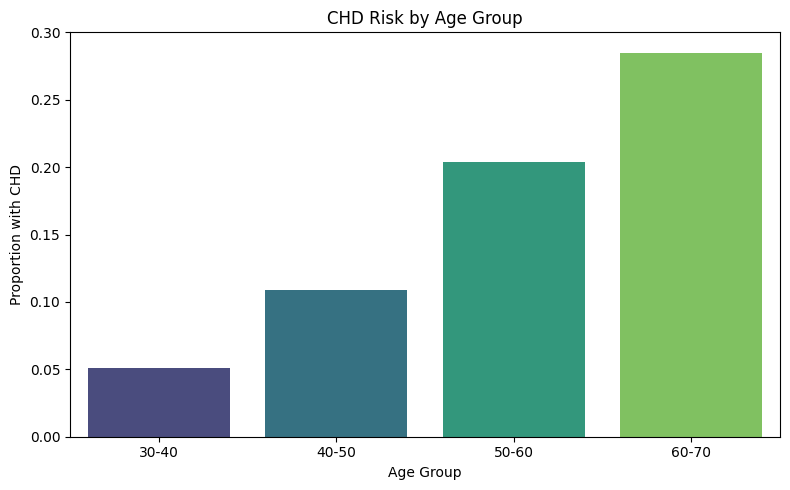

In [ ]:
# CHD rate grouped by age brackets
df['age_group'] = pd.cut(df['age'], bins=[30, 40, 50, 60, 70], labels=['30-40', '40-50', '50-60', '60-70'])

plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='TenYearCHD', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title('CHD Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with CHD')
plt.ylim(0, 0.3)
plt.tight_layout()
plt.show()

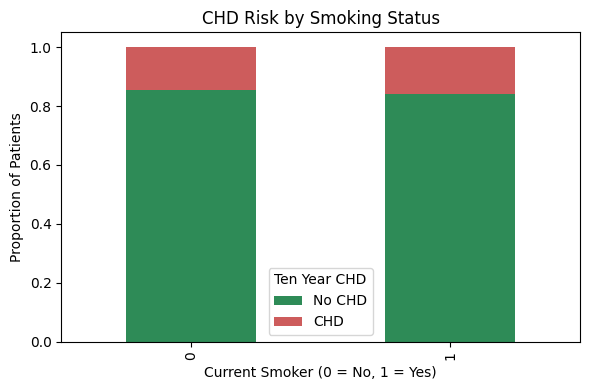

In [ ]:
# Smoking status vs CHD distribution (stacked proportion bars)
smoke_chd = pd.crosstab(df['currentSmoker'], df['TenYearCHD'], normalize='index')

smoke_chd.plot(kind='bar', stacked=True, color=['seagreen', 'indianred'], figsize=(6, 4))
plt.title('CHD Risk by Smoking Status')
plt.xlabel('Current Smoker (0 = No, 1 = Yes)')
plt.ylabel('Proportion of Patients')
plt.legend(['No CHD', 'CHD'], title='Ten Year CHD')
plt.tight_layout()
plt.show()

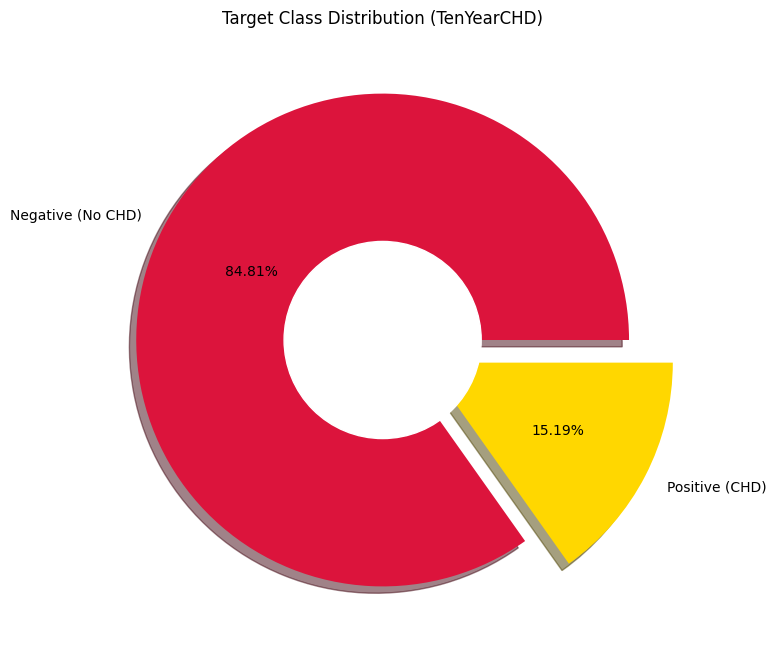

In [ ]:
# Plot target class distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    df['TenYearCHD'].value_counts(),
    labels=['Negative (No CHD)', 'Positive (CHD)'],
    autopct='%1.2f%%',
    explode=[0, 0.2],
    shadow=True,
    colors=['crimson', 'gold']
)

# Create a donut chart look
my_circle = plt.Circle((0, 0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Target Class Distribution (TenYearCHD)')
plt.show()

# **4. Data Cleaning and Preprocessing**
####--------------------------------------------------------------------------------------------------

In [ ]:
# Remove any non-numeric or derived columns (like 'age_group') before imputation
df_numeric = df.select_dtypes(include=[np.number]).copy()

print("Before imputation:")
print(df_numeric.isnull().sum())

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

print("\nAfter KNN imputation:")
print(df_imputed.isnull().sum())

Before imputation:
Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

After KNN imputation:
Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
# Drop features that are not predictive or redundant
print("\nDropping column: 'education'")
df_imputed.drop(columns=['education'], inplace=True)


Dropping column: 'education'


In [ ]:
# Drop correlated/redundant variables
print("\nDropping correlated variables: 'diaBP' and 'diabetes'")
df_imputed.drop(columns=['diaBP', 'diabetes'], inplace=True)


Dropping correlated variables: 'diaBP' and 'diabetes'


In [ ]:
# Outlier capping for continuous variables
print("\nApplying outlier capping...")

cont_vars = ['glucose', 'totChol', 'BMI', 'sysBP', 'heartRate']
max_limits = [200, 400, 45, 180, 130]

for var, max_val in zip(cont_vars, max_limits):
    outliers = df_imputed[df_imputed[var] > max_val].shape[0]
    df_imputed.loc[df_imputed[var] > max_val, var] = max_val
    print(f"Capped {outliers} values in '{var}' above {max_val}")

# Handle heartRate lower bound
low_hr_count = df_imputed[df_imputed['heartRate'] < 50].shape[0]
df_imputed.loc[df_imputed['heartRate'] < 50, 'heartRate'] = 50
print(f"Capped {low_hr_count} values in 'heartRate' below 50")


Applying outlier capping...
Capped 34 values in 'glucose' above 200
Capped 10 values in 'totChol' above 400
Capped 4 values in 'BMI' above 45
Capped 158 values in 'sysBP' above 180
Capped 2 values in 'heartRate' above 130
Capped 10 values in 'heartRate' below 50


In [ ]:
# Log transform highly skewed variables to normalize distributions
# We'll apply to glucose and totChol only
df_imputed['glucose'] = np.log1p(df_imputed['glucose'])
df_imputed['totChol'] = np.log1p(df_imputed['totChol'])


In [ ]:
# Normalize features using StandardScaler
print("\nScaling numeric features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed.drop(columns=['TenYearCHD']))

df_scaled = pd.DataFrame(X_scaled, columns=df_imputed.columns.drop('TenYearCHD'))
df_scaled['TenYearCHD'] = df_imputed['TenYearCHD'].values

print("Feature scaling complete.")
print("First 5 rows:")
print(df_scaled.head().T)


Scaling numeric features...
Feature scaling complete.
First 5 rows:
                        0         1         2         3         4
Gender           1.153113 -0.867217  1.153113 -0.867217 -0.867217
age             -1.234283 -0.417664 -0.184345  1.332233 -0.417664
currentSmoker   -0.988276 -0.988276  1.011863  1.011863  1.011863
cigsPerDay      -0.757694 -0.757694  0.924836  1.766102  1.177216
BPMeds          -0.176046 -0.176046 -0.176046 -0.176046 -0.176046
prevalentStroke -0.077014 -0.077014 -0.077014 -0.077014 -0.077014
prevalentHyp    -0.671241 -0.671241 -0.671241  1.489778 -0.671241
totChol         -0.964359  0.392919  0.282502 -0.182822  1.109255
sysBP           -1.271157 -0.531094 -0.210400  0.899694 -0.087056
BMI              0.290076  0.725199 -0.112906  0.688114 -0.666698
heartRate        0.343777  1.596121 -0.073672 -0.908568  0.761225
glucose         -0.194985 -0.265927 -0.711955  1.386688  0.341830
TenYearCHD       0.000000  0.000000  0.000000  1.000000  0.000000


# **5. Data Partitioning**
####---------------------------------------------------------------

In [ ]:
# Set random seed for reproducibility
RANDOM_STATE = 42

# Separate features and target
X = df_scaled.drop(columns=['TenYearCHD'])
y = df_scaled['TenYearCHD']

# Perform 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

# Print dataset sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 3180 samples
Testing set size: 1060 samples


In [ ]:
# Handle class imbalance using SMOTE on training data
from imblearn.over_sampling import SMOTE

print("\nBefore SMOTE:")
print(y_train.value_counts())

# Initialize SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=RANDOM_STATE)

# Apply SMOTE only on the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE (Training Set Resampling):")
print(pd.Series(y_train_smote).value_counts())


Before SMOTE:
TenYearCHD
0.0    2697
1.0     483
Name: count, dtype: int64

After SMOTE (Training Set Resampling):
TenYearCHD
0.0    2697
1.0    2697
Name: count, dtype: int64


# **6. Model Training Phase**
####-----------------------------------------------------------------------

In [ ]:
# Select appropriate K values for model evaluation
# Small, medium, and larger K for comparison
k_values = [5, 21, 35]

print(f"Selected K values for evaluation: {k_values}")

Selected K values for evaluation: [5, 21, 35]


In [ ]:
# Training using SMOTE-balanced training data
knn_models = {}
train_predictions = {}
test_predictions = {}
train_accuracies = {}
test_accuracies = {}

for k in k_values:
    # Initialize and train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)   # using SMOTE data here

    # Store the trained model
    knn_models[k] = knn

    # Predict on SMOTE training data and original test data
    y_train_pred = knn.predict(X_train_smote)
    y_test_pred = knn.predict(X_test)

    # Store predictions
    train_predictions[k] = y_train_pred
    test_predictions[k] = y_test_pred

    # Calculate and store accuracies
    train_accuracies[k] = accuracy_score(y_train_smote, y_train_pred)
    test_accuracies[k] = accuracy_score(y_test, y_test_pred)

    # Print training results
    print(f"\nModel trained with K = {k}")
    print(f"Training Accuracy (SMOTE): {train_accuracies[k]:.4f}")


Model trained with K = 5
Training Accuracy (SMOTE): 0.8758

Model trained with K = 21
Training Accuracy (SMOTE): 0.7753

Model trained with K = 35
Training Accuracy (SMOTE): 0.7462


# **7. Model Testing Phase**
####-----------------------------------------------------------------------

In [ ]:
# Compare training and testing accuracy for all three models
print("Training and Testing Accuracy Comparison:")

for k in k_values:
    print(f"\nK = {k}")
    print(f"Training Accuracy: {train_accuracies[k]:.4f}")
    print(f"Testing Accuracy: {test_accuracies[k]:.4f}")

Training and Testing Accuracy Comparison:

K = 5
Training Accuracy: 0.8758
Testing Accuracy: 0.6481

K = 21
Training Accuracy: 0.7753
Testing Accuracy: 0.6198

K = 35
Training Accuracy: 0.7462
Testing Accuracy: 0.6132


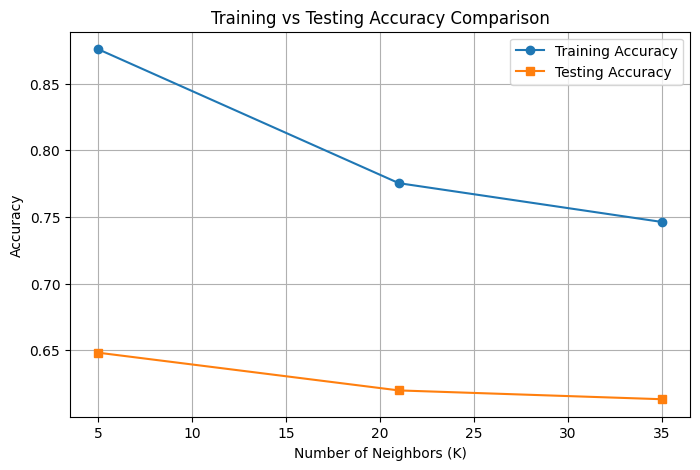

In [ ]:
# Visualize train and test accuracies across chosen K values
plt.figure(figsize=(8, 5))
plt.plot(k_values, [train_accuracies[k] for k in k_values], marker='o', label='Training Accuracy')
plt.plot(k_values, [test_accuracies[k] for k in k_values], marker='s', label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# **7. Model Evaluation Phase**
####-----------------------------------------------------------------------

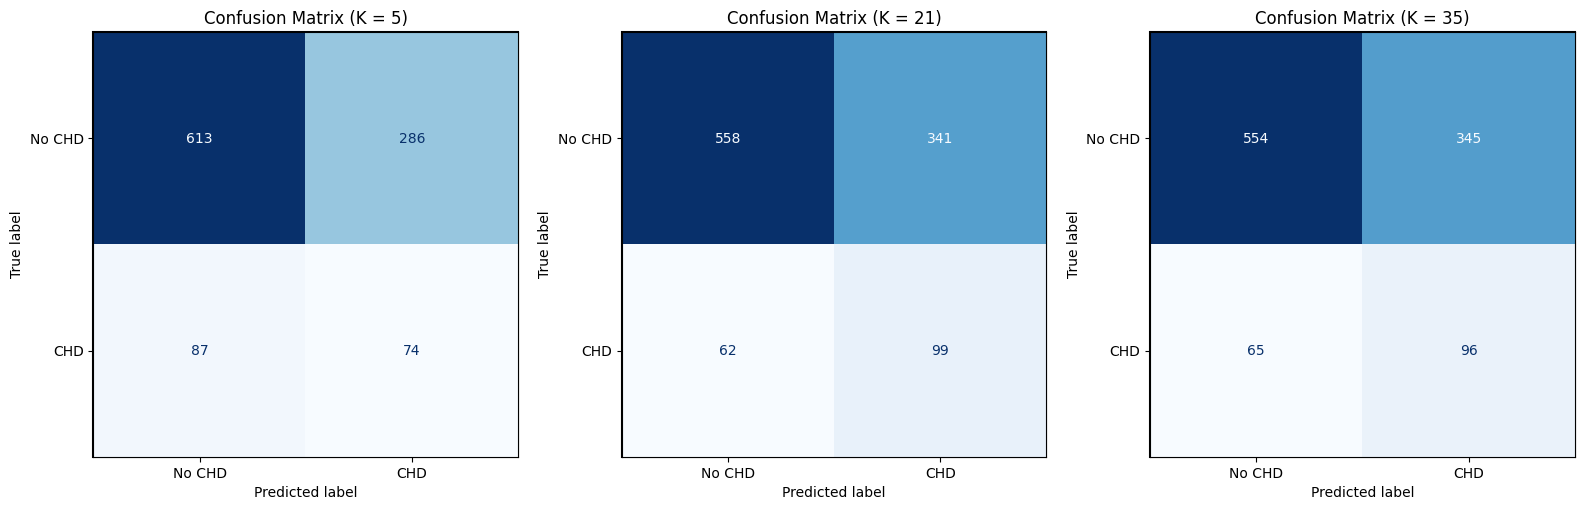

In [ ]:
# Define figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # 1 row, 3 columns

# Define K values
k_list = [5, 21, 35]

for i, k in enumerate(k_list):
    cm = confusion_matrix(y_test, test_predictions[k])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No CHD', 'CHD'])

    # Plot to specific axis
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'Confusion Matrix (K = {k})')

    # Add border
    axes[i].patch.set_edgecolor('black')
    axes[i].patch.set_linewidth(1.5)

# Clean layout
plt.tight_layout()
plt.show()

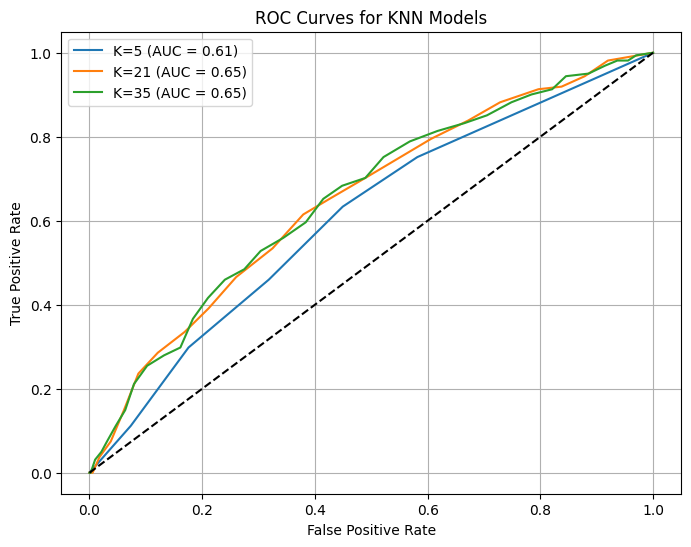

In [ ]:
# Plot ROC-AUC for all models
plt.figure(figsize=(8, 6))

for k in k_values:
    y_probs = knn_models[k].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'K={k} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN Models')
plt.legend()
plt.grid(True)
plt.show()

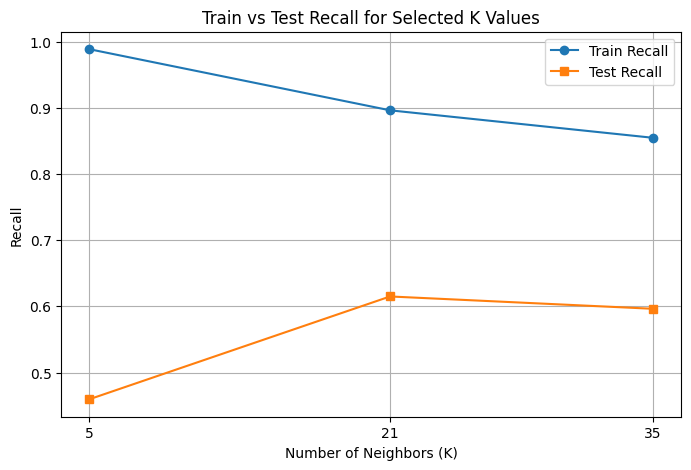

In [ ]:
# Calculate recall for the selected K values
selected_k_values = [5, 21, 35]

train_recalls = []
test_recalls = []

for k in selected_k_values:
    model = knn_models[k]
    train_recalls.append(recall_score(y_train_smote, train_predictions[k]))
    test_recalls.append(recall_score(y_test, test_predictions[k]))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(selected_k_values, train_recalls, marker='o', label='Train Recall')
plt.plot(selected_k_values, test_recalls, marker='s', label='Test Recall')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall')
plt.title('Train vs Test Recall for Selected K Values')
plt.xticks(selected_k_values)
plt.grid(True)
plt.legend()
plt.show()

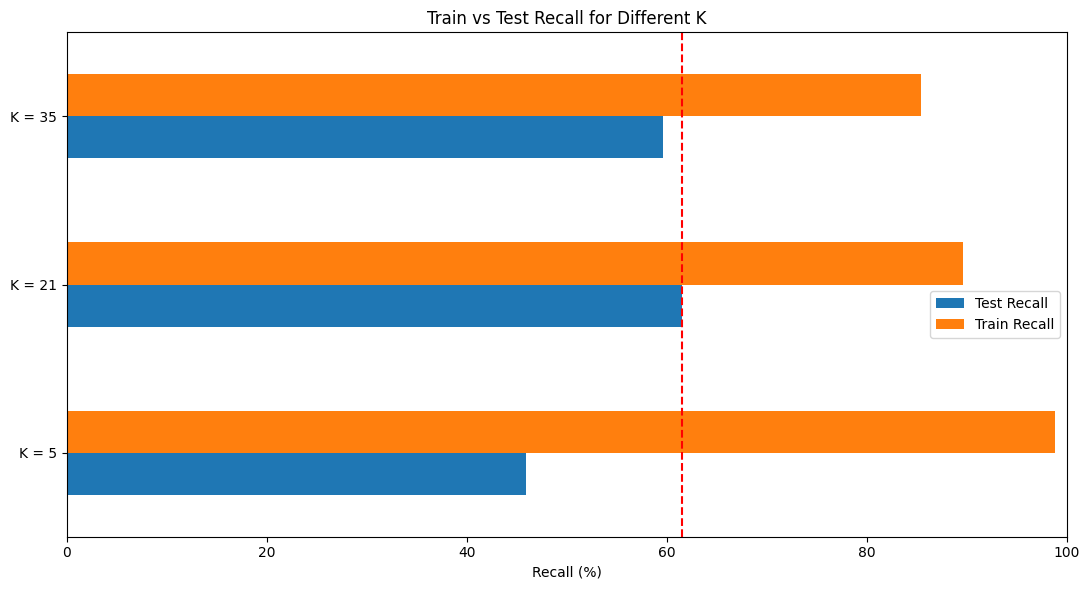

In [ ]:
# Build a results_df to visualize recall performance across models
results_df = pd.DataFrame({
    'Train Recall': [recall_score(y_train_smote, train_predictions[k]) * 100 for k in k_values],
    'Test Recall': [recall_score(y_test, test_predictions[k]) * 100 for k in k_values]
}, index=[f'K = {k}' for k in k_values])

# Plot
results_df[['Test Recall', 'Train Recall']].plot(kind='barh', figsize=(11, 6))
plt.xlabel('Recall (%)')
plt.xlim((0, 100))
plt.axvline(results_df['Test Recall'].max(), color='red', linestyle='--')
plt.title('Train vs Test Recall for Different K')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [ ]:
# Compile evaluation metrics
summary_data = []
for k in k_values:
    y_pred = test_predictions[k]
    y_proba = knn_models[k].predict_proba(X_test)[:, 1]

    summary_data.append({
        'K': k,
        'Accuracy': test_accuracies[k],
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
    })

# Create summary DataFrame
evaluation_df = pd.DataFrame(summary_data).set_index('K')
display(evaluation_df.round(4))

,Accuracy,Precision,Recall,F1 Score,AUC,MAE,MSE
K,,,,,,,
5,0.6481,0.2056,0.4596,0.2841,0.6087,0.3519,0.3519
21,0.6198,0.2250,0.6149,0.3295,0.6509,0.3802,0.3802
35,0.6132,0.2177,0.5963,0.3189,0.6537,0.3868,0.3868


In [ ]:
# Combine scaled features and target variable into a single DataFrame
cleaned_df = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)

# Export the cleaned dataset to CSV
cleaned_df.to_csv('cleaned_framingham_dataset.csv', index=False)

# preview first few rows
cleaned_df.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.153113,-1.234283,-0.988276,-0.757694,-0.176046,-0.077014,-0.671241,-0.964359,-1.271157,0.290076,0.343777,-0.194985,0.0
1,-0.867217,-0.417664,-0.988276,-0.757694,-0.176046,-0.077014,-0.671241,0.392919,-0.531094,0.725199,1.596121,-0.265927,0.0
2,1.153113,-0.184345,1.011863,0.924836,-0.176046,-0.077014,-0.671241,0.282502,-0.210400,-0.112906,-0.073672,-0.711955,0.0
3,-0.867217,1.332233,1.011863,1.766102,-0.176046,-0.077014,1.489778,-0.182822,0.899694,0.688114,-0.908568,1.386688,1.0
4,-0.867217,-0.417664,1.011863,1.177216,-0.176046,-0.077014,-0.671241,1.109255,-0.087056,-0.666698,0.761225,0.341830,0.0


# **Best Model Selection**

Based on the evaluation results, the best-performing model is the **K-Nearest Neighbors (KNN)** classifier with **K = 21**, trained on **SMOTE-balanced data**. While this model exhibits a lower overall accuracy compared to models trained on imbalanced data, it significantly improves performance in detecting **CHD-positive cases**, which is the primary objective of this study.

To validate the impact of SMOTE, we also trained and tested the same model (K = 21) on **original imbalanced data** in a separate testing environment. The comparison revealed that although the non-SMOTE model achieved higher overall accuracy, it failed to detect most positive CHD cases, as indicated by an extremely low recall score.

The SMOTE-trained K=21 model achieved the **highest recall (61.49%)**, the **best F1-score (32.95%)**, and a competitive **AUC score (0.6509)** — all indicating robust performance in identifying at-risk individuals. In healthcare applications, particularly in **cardiovascular risk prediction**, the cost of false negatives is high. Therefore, improving recall is prioritized over maximizing overall accuracy.

The table below compares the evaluation results **before and after applying SMOTE**, highlighting the trade-offs and performance gains:

---

| **Metric**   | **Without SMOTE** | **With SMOTE** | **Change**                |
|--------------|-------------------|----------------|---------------------------|
| Accuracy     | 84.62%            | 61.98%         | 🔻 Decreased              |
| Precision    | 41.67%            | 22.50%         | 🔻 Decreased              |
| Recall       | 3.11%             | 61.49%         | 🔺 **Massive increase**   |
| F1 Score     | 5.78%             | 32.95%         | 🔺 Significant improvement|
| AUC          | 0.6553            | 0.6509         | ➖ Slightly lower, stable |

---

These results demonstrate that while SMOTE introduces a trade-off in terms of accuracy and precision, it **greatly enhances the model's ability to detect positive CHD cases**, which aligns with the goal of **early intervention and risk mitigation in cardiovascular health**.

